<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-поведения-пользователей-мобильного-приложения,-продающего-продукты-питания." data-toc-modified-id="Анализ-поведения-пользователей-мобильного-приложения,-продающего-продукты-питания.-1">Анализ поведения пользователей мобильного приложения, продающего продукты питания.</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных:" data-toc-modified-id="Предобработка-данных:-1.1">Предобработка данных:</a></span></li><li><span><a href="#Изучение-и-проверка-данных:" data-toc-modified-id="Изучение-и-проверка-данных:-1.2">Изучение и проверка данных:</a></span></li><li><span><a href="#Изучение-воронки-событий:" data-toc-modified-id="Изучение-воронки-событий:-1.3">Изучение воронки событий:</a></span><ul class="toc-item"><li><span><a href="#Комментарий-от-ревьюера-v_1" data-toc-modified-id="Комментарий-от-ревьюера-v_1-1.3.1">Комментарий от ревьюера v_1</a></span></li><li><span><a href="#Комментарий-студента:" data-toc-modified-id="Комментарий-студента:-1.3.2">Комментарий студента:</a></span></li></ul></li><li><span><a href="#Результаты-эксперимента" data-toc-modified-id="Результаты-эксперимента-1.4">Результаты эксперимента</a></span><ul class="toc-item"><li><span><a href="#Комментарий-от-ревьюера-v_1" data-toc-modified-id="Комментарий-от-ревьюера-v_1-1.4.1">Комментарий от ревьюера v_1</a></span></li><li><span><a href="#Комментарий-от-ревьюера-v_1" data-toc-modified-id="Комментарий-от-ревьюера-v_1-1.4.2">Комментарий от ревьюера v_1</a></span></li><li><span><a href="#Комментарий-студента:" data-toc-modified-id="Комментарий-студента:-1.4.3">Комментарий студента:</a></span></li><li><span><a href="#Комментарий-от-ревьюера-v_1" data-toc-modified-id="Комментарий-от-ревьюера-v_1-1.4.4">Комментарий от ревьюера v_1</a></span></li><li><span><a href="#Комментарий-от-ревьюера-v_1" data-toc-modified-id="Комментарий-от-ревьюера-v_1-1.4.5">Комментарий от ревьюера v_1</a></span></li><li><span><a href="#Комментарий-от-ревьюера-v_1" data-toc-modified-id="Комментарий-от-ревьюера-v_1-1.4.6">Комментарий от ревьюера v_1</a></span></li><li><span><a href="#Комментарий-студента:" data-toc-modified-id="Комментарий-студента:-1.4.7">Комментарий студента:</a></span></li></ul></li></ul></li></ul></div>

# Анализ поведения пользователей мобильного приложения, продающего продукты питания. 

**Цель исследования: Проведение А/A/B-теста с целью выяснения: изменилось ли количество пользователей, перешедших на следующий этап оформления товара, после изменения шрифтов.**

Задачи:

 - Предобработка данных. 
 - Изучение и проверка данных.
 - Изучение воронки событий.
 - Результаты эксперимента.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import datetime as dt
import numpy as np
import math as mth
import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
    data = pd.read_csv('...')
except:
    data = pd.read_csv('...')

## Предобработка данных:

In [3]:
data.columns = ['event', 'user_id', 'timestamp', 'exper'] # переименование столбцов

In [4]:
# добавление двух столбцов с данными в соответствующих форматах
data['date'] = pd.to_datetime(data['timestamp'],unit='s')
data['dt'] = pd.to_datetime(data['date']).dt.round('1D')

In [5]:
data.head()

,event,user_id,timestamp,exper,date,dt
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


In [6]:
# считаем дубликаты
print(data.duplicated().sum())

413


In [7]:
#удаляем дубликаты
data = data.drop_duplicates().reset_index()

In [8]:
#проверка попадания пользователей в разные группы
duble_users = data.groupby('user_id').agg({'exper': 'nunique'}).query('exper > 1')
print('Количество пользователей попавших в обе группы:', len(duble_users))

Количество пользователей попавших в обе группы: 0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   index      243713 non-null  int64         
 1   event      243713 non-null  object        
 2   user_id    243713 non-null  int64         
 3   timestamp  243713 non-null  int64         
 4   exper      243713 non-null  int64         
 5   date       243713 non-null  datetime64[ns]
 6   dt         243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(1)
memory usage: 13.0+ MB


## Изучение и проверка данных:

In [10]:
print('Всего событий в логе', data['event'].count())

Всего событий в логе 243713


In [11]:
print('Всего пользователей в логе', data['user_id'].nunique())

Всего пользователей в логе 7551


В среднем событий приходится на пользователя 32


count    7551.000000
mean       32.275593
std        65.154219
min         1.000000
25%         9.000000
50%        20.000000
75%        37.000000
max      2307.000000
Name: event_count, dtype: float64

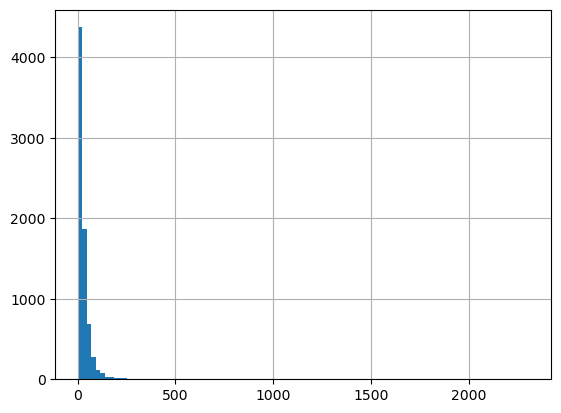

In [12]:
print('В среднем событий приходится на пользователя', round(data.groupby('user_id')['event'].count().mean()))
event_user = data.groupby('user_id').agg(event_count=('event', 'count')).reset_index()
event_user['event_count'].hist(bins=100)
event_user['event_count'].describe()

In [13]:
print('Минимальная дата лога', min(data['dt']))
print('Максимальная дата лога', max(data['dt']))

Минимальная дата лога 2019-07-25 00:00:00
Максимальная дата лога 2019-08-08 00:00:00


<AxesSubplot:>

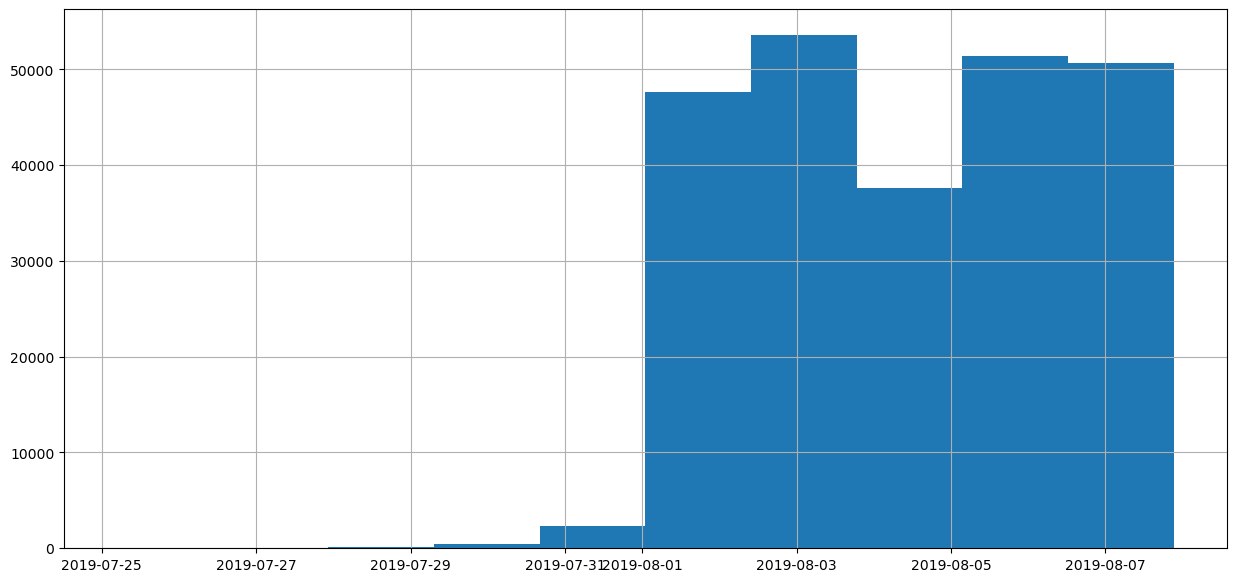

In [14]:
data['date'].hist(figsize=(15, 7))

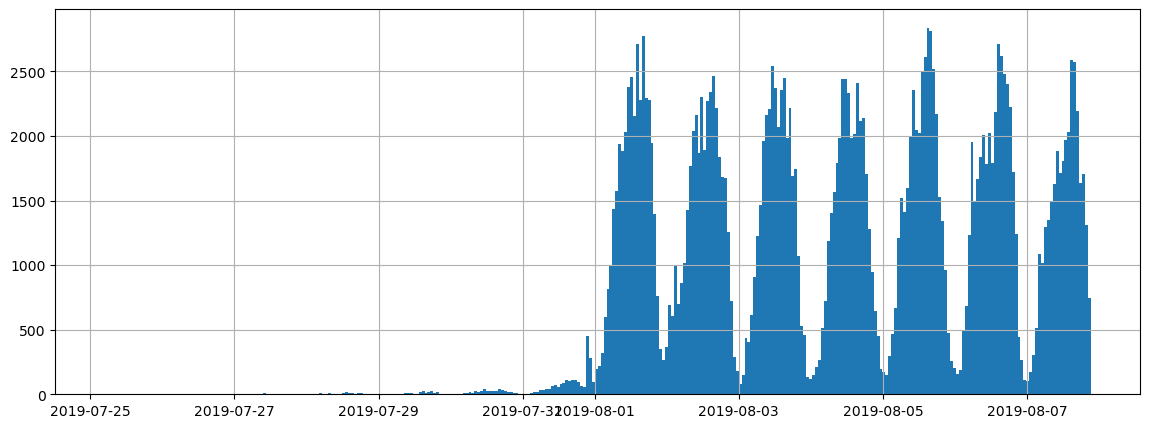

In [15]:
# вариант графика
data['date'].hist(bins=14*24, figsize=(14, 5));

In [16]:
# убираем события из прошлого "доехавшие" по некоторым пользователям, которые заканцивали цикл действий
data2 = data.query('date >="2019-08-01"')

# анализируем удаленные данные
data_del = data.query('date <"2019-08-01"')
print('Потеряли событий при удалении "прошлого"', data.shape[0]-data2.shape[0],
     "({:.1%})".format((data.shape[0]-data2.shape[0])/data.shape[0]))

print('Потеряли уникальных пользователей при удалении "прошлого"', \
      data['user_id'].nunique() - data2['user_id'].nunique(), \
      "({:.1%})".format((data['user_id'].nunique() - data2['user_id'].nunique())/data['user_id'].nunique()))

Потеряли событий при удалении "прошлого" 2826 (1.2%)
Потеряли уникальных пользователей при удалении "прошлого" 17 (0.2%)


*Вывод по удаленным данным:*
 - потеряли 1.2% событий
 - потеряли 0.2% уникальных пользователей (если будете перезапускать расчеты, придется подождать пару минут, долго считает цикл)

In [17]:
# количество пользователей по группам (по новым данным)
data2.groupby('exper')['user_id'].nunique()

exper
246    2484
247    2513
248    2537
Name: user_id, dtype: int64

## Изучение воронки событий:

**Количество событий в логах:**

In [18]:
data2.groupby('event').agg(total=('event', 'count')).sort_values(by='total', ascending=False)

,total
event,
MainScreenAppear,117328
OffersScreenAppear,46333
CartScreenAppear,42303
PaymentScreenSuccessful,33918
Tutorial,1005


**Количество пользователей совершавших эти события:**

In [19]:
event_users = data2.groupby('event', as_index=False).agg(total=('user_id', 'nunique')).sort_values(by='total', ascending=False)
event_users.reset_index(drop=True, inplace=True)
event_users

,event,total
0,MainScreenAppear,7419
1,OffersScreenAppear,4593
2,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


**Доля пользователей, которые хоть раз совершали событие:**

In [20]:
event_users2 = data2.groupby('event', as_index=False).agg(total=('user_id', 'nunique')).sort_values(by='total', ascending=False)
event_users2.reset_index(drop=True, inplace=True)
event_users2['proportion_users'] = round(event_users2['total'] / data['user_id'].nunique() *100, 1)
event_users2

,event,total,proportion_users
0,MainScreenAppear,7419,98.3
1,OffersScreenAppear,4593,60.8
2,CartScreenAppear,3734,49.5
3,PaymentScreenSuccessful,3539,46.9
4,Tutorial,840,11.1


**В каком порядке происходят события:**

Логичнее было бы так:

- 1) MainScreenAppear (заглавная страница)
- 2) Tutorial (руководство)
- 3) CartScreenAppear	(просмотр карточки товара)
- 4) OffersScreenAppear (корзина)
- 5) PaymentScreenSuccessful (оплата)

но руководство читает 11% пользователей, зашедших на 1-ю страницу, а некоторые пользователи не смотрят карточку товара (видимо уже знают хорошо продукт) и сразу кладут его в корзину.

Таким образом не все события выстраиваются в логическую (последовательную) цепочку.

**Доля пользователей проходящих на следующий шаг воронки:**

In [22]:
#исключаем воронку Tutorial
event_users_no_tuttorial = event_users.query('event != "Tutorial"')

for i in range(len(event_users_no_tuttorial)):
    if i == 0:
        event_users_no_tuttorial.loc[i, 'next_total'] = event_users_no_tuttorial.loc[i, 'total']
    else:
        event_users_no_tuttorial.loc[i, 'next_total'] = event_users_no_tuttorial.loc[i-1, 'total']
    
event_users_no_tuttorial['proportion_users_to_next_level'] = round(event_users_no_tuttorial['total'] / event_users_no_tuttorial['next_total'] * 100, 1)
event_users_no_tuttorial

,event,total,next_total,proportion_users_to_next_level
0,MainScreenAppear,7419,7419.0,100.0
1,OffersScreenAppear,4593,7419.0,61.9
2,CartScreenAppear,3734,4593.0,81.3
3,PaymentScreenSuccessful,3539,3734.0,94.8


*Вывод:*
 - больше всего пользователей теряется при переходе на страницу OffersScreenAppear,
 - от 1-ого события до оплаты проходит 47.7% пользователей.

## Результаты эксперимента

Количество пользователей в каждой экспериментальной группе:

In [23]:
# количество пользователей по группам (по новым данным)
exp_users = data2.groupby('exper')['user_id'].nunique()
exp_users

exper
246    2484
247    2513
248    2537
Name: user_id, dtype: int64

**Проверка гипотез для пропорции (сравнения пропорций двух генеральных совокупностей по выборкам из них):**

Используем Z-тест.

По условию, нужно сопоставить доли по каждому событию между:

 - контрольными группами 246 и 247;
 - каждой из контрольной группы по отдельности и экспериментальной (246-248 и 247-248);
 - объединенной контрольной группой и экспериментальной (246+247 и 248).
 
Всего у нас 4 вида событий (Tutorial не учитываем): 4 A/A теста и 12 А/В, чтобы застраховать себя от ложного результата вводим поправку Бонферрони равную 16.

In [24]:
#убираем событие Tutorial
data3 = data2.query('event != "Tutorial"')

In [25]:
 '''
 Функция принимает 1-событие, 2-датафрейм с уникальными пользователями(группа 1), 
 3-датафрейм с уникальными пользователями(группа 2),
 4-критический уровень статистической значимости, 5-поправка Бонферрони.
 
 Для каждого события попарно проверяется - есть ли статистически значимая разница между долями пользователей, 
 совершивших его в группе 1 и группе 2 (одно А/А тестирование по 4-ем воронкам и три А/В тестирования по 4-ем воронкам)
 
 Так как распределение статистики нормальное, вызовем метод cdf().
    Саму статистику возьмём по модулю методом abs() — чтобы получить правильный результат независимо от её знака.
    Это возможно, потому что тест двусторонний. По этой же причине удваиваем результат
 '''
def z_test (event, df1, df2, alpha, n):

    # критический уровень статистической значимости c поправкой Бонферрони
    bonferroni_alpha = alpha / n

    # число пользователей в группе 1 и группе 2
    trials = np.array([df1['user_id'].nunique(), df2['user_id'].nunique()])

    # число пользователей, совершивших событие в группе 1 и группе 2
    successes = np.array([df1[df1['event'] == event]['user_id'].nunique(), df2[df2['event'] == event]['user_id'].nunique()])

    # пропорция успехов в 1-ой группе:
    p1 = successes[0]/trials[0]

    # пропорция успехов во 2-ой группе:
    p2 = successes[1]/trials[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    # разница пропорций в датасетах
    difference = p1 - p2 

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('Событие:', event)
    print('p-значение: ', p_value)

    if p_value < bonferroni_alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 

Указываем гипотезы:
 - Н0: Доля пользователей проходящих на следующий шаг воронки одинаковы для группы 1 и группы 2
 - Н1: Доля пользователей проходящих на следующий шаг воронки НЕ одинаковы для группы 1 и группы 2

**Проверяем есть ли статистически значимая разница между контрольными группами 246 и 247 (А/А-тест):**

In [26]:
for event in data3['event'].unique():
    z_test (event, data3[data3['exper']==246], data3[data3['exper']==247], 0.05, 16)
    print()

Событие: MainScreenAppear
p-значение:  0.7526703436483038
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: OffersScreenAppear
p-значение:  0.24786096925282264
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: CartScreenAppear
p-значение:  0.22867643757335676
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: PaymentScreenSuccessful
p-значение:  0.11446627829276612
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



*Вывод: по итогам А/А-теста между группами 246 и 247 ни по одному событию нет статистически значимой разницы при заданном уровне значимости и поправке,  приступаем к A/B-тестированию.*

**Проверяем есть ли статистически значимая разница между контрольными группами 246 и 248 (А/В-тест):**

In [27]:
for event in data3['event'].unique():
    z_test (event, data3[data3['exper']==246], data3[data3['exper']==248], 0.05, 16)
    print()

Событие: MainScreenAppear
p-значение:  0.3387114076159288
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: OffersScreenAppear
p-значение:  0.21442476639710506
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: CartScreenAppear
p-значение:  0.08067367598823139
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: PaymentScreenSuccessful
p-значение:  0.21693033984516674
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



*Вывод: по итогам А/В-теста между группами 246 и 248 ни по одному событию нет статистически значимой разницы при заданном уровне значимости и поправке. Изменение шрифта не дало результата по изменению пользователей, перешедших на следующий этап оформления товара.*

**Проверяем есть ли статистически значимая разница между контрольными группами 247 и 248 (А/В-тест):**

In [28]:
for event in data3['event'].unique():
    z_test (event, data3[data3['exper']==247], data3[data3['exper']==248], 0.05, 16)
    print()

Событие: MainScreenAppear
p-значение:  0.5194964354051703
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: OffersScreenAppear
p-значение:  0.9333751305879443
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: CartScreenAppear
p-значение:  0.5878284605111943
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: PaymentScreenSuccessful
p-значение:  0.7275718682261119
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



*Вывод: по итогам А/В-теста между группами 247 и 248 ни по одному событию нет статистически значимой разницы при заданном уровне значимости и поправке. Изменение шрифта не дало результата по изменению пользователей, перешедших на следующий этап оформления товара.*

**Проверяем есть ли статистически значимая разница между контрольными группами 246+247(объединенная группа) и 248 (А/В-тест):**

In [29]:
for event in data3['event'].unique():
    z_test (event, data3[data3['exper']!=248], data3[data3['exper']==248], 0.05, 16)
    print()

Событие: MainScreenAppear
p-значение:  0.3486684291093256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: OffersScreenAppear
p-значение:  0.44582745409482394
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: CartScreenAppear
p-значение:  0.18683558686831558
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: PaymentScreenSuccessful
p-значение:  0.6107918742187335
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



*Вывод: по итогам А/В-теста между объединенными группами 246+247 (А+А группа) и группой 248 (В группа) ни по одному событию нет статистически значимой разницы при заданном уровне значимости и поправке. Изменение шрифта не дало результата по изменению пользователей, перешедших на следующий этап оформления товара.*

**Общий Вывод:**

Подготовлены данные и проанализированы поведение покупателей на основании логов действий пользователей мобильного приложения.

Проанализированы результаты А/А/В-теста. 

Выявлено:

 - Главную страницу увидели 7419 пользователей (100% от общего числа),
 - Корзину смотрели 4593 пользователей (61,9% от общего числа),
 - Карточку товара смотрели 3734 пользователя (50.3% от общего числа),
 - Совершили оплату 3539 пользователей (47,7% от общего числа).

Событие (Tutorial) исключено из анализа ввиду необязательного прохождения и отсутствия влияния на остальные шаги.

А/А/В-эксперимент по изменению шрифта во всем приложении проведен за период с 01.08.2019 по 08.08.2019.

В эксперименте участвовало 3 группы пользователей:

 - А (246-ая) - 2484 пользователя,
 - А (247-ая) - 2513 пользователя,
 - В (248-ая) - 2537 пользователя.

По условию, нужно было сопоставить доли по каждому событию между:

 - контрольными группами 246 и 247,
 - каждой из контрольной группы по отдельности и экспериментальной (246-248 и 247-248),
 - объединенной контрольной группой и экспериментальной (246+247 и 248).

С учетом множественного теста, а именно 16 (4 события в каждом из 4-ех экспериментов), чтобы застраховать себя от ложного результата была введена поправка Бонферрони равная 16.

Контрольный А/А-тест по каждому событию пройден успешно.
Множесто А/В-тестов, проведённых по каждому из событий, не обнаружили статистически значимой разницы между группами.

**Т.е. изменение шрифта в приложении не повлияло на поведение пользователей на всех этапах совершения покупки.**